In [1]:
import os
from sys import argv, stdout, stderr
from ROOT import TFile, gROOT, TCanvas, TLegend
import sys                                                                                                                                                                                                                                                  
gROOT.SetStyle("Plain")                                                                                                                                                                                                                                           
gROOT.SetBatch(True)

Welcome to JupyROOT 6.12/07


In [2]:
def positivize(histogram):
    output = histogram.Clone()
    for i in range(output.GetSize()):
        if output.GetArray()[i] < 0:
            output.AddAt(0, i)
    return output

In [3]:
fmc = TFile('MC.root')
fdata = TFile('QCD_Pt-20toInf_MuEnrichedPt15_TuneCP5_13TeV_pythia8_v14-v1.root')
femb = TFile('Embed.root')
fm = TFile('Monte.root')

ht = fdata.Get('TauLooseOS0Jet/ePt')
he = fdata.Get('EleLooseOS0Jet/ePt')
het = fdata.Get('EleLooseTauLooseOS0Jet/ePt')
hqcd = ht.Clone()
hqcd.Add(he)
hqcd.Add(het, -1)
hqcd = positivize(hqcd)
hmt = fmc.Get('TauLooseOS0Jet/ePt')
hme = fmc.Get('EleLooseOS0Jet/ePt')
hmet = fmc.Get('EleLooseTauLooseOS0Jet/ePt')
hmqcd = hmt.Clone()
hmqcd.Add(hme)
hmqcd.Add(hmet, -1)
hmqcd = positivize(hmqcd)
hqcd.Add(hmqcd, -1)
hqcd = positivize(hqcd) 
hdata = fdata.Get('TightOS0Jet/ePt')
hemb = femb.Get('TightOS0Jet/ePt')
hm = fm.Get('TightOS0Jet/ePt')
hm.Add(hqcd)
h0 = hdata.Clone()
h0.Add(hm, -1)
h0 = positivize(h0)
h0.Divide(hemb)

ht = fdata.Get('TauLooseOS1Jet/ePt')
he = fdata.Get('EleLooseOS1Jet/ePt')
het = fdata.Get('EleLooseTauLooseOS1Jet/ePt')
hqcd = ht.Clone()
hqcd.Add(he)
hqcd.Add(het, -1)
hqcd = positivize(hqcd)
hmt = fmc.Get('TauLooseOS1Jet/ePt')
hme = fmc.Get('EleLooseOS1Jet/ePt')
hmet = fmc.Get('EleLooseTauLooseOS1Jet/ePt')
hmqcd = hmt.Clone()
hmqcd.Add(hme)
hmqcd.Add(hmet, -1)
hmqcd = positivize(hmqcd)
hqcd.Add(hmqcd, -1)
hqcd = positivize(hqcd) 
hdata = fdata.Get('TightOS1Jet/ePt')
hemb = femb.Get('TightOS1Jet/ePt')
hm = fm.Get('TightOS1Jet/ePt')
hm.Add(hqcd)
h1 = hdata.Clone()
h1.Add(hm, -1)
h1 = positivize(h1)
h1.Divide(hemb)

ht = fdata.Get('TauLooseOS2Jet/ePt')
he = fdata.Get('EleLooseOS2Jet/ePt')
het = fdata.Get('EleLooseTauLooseOS2Jet/ePt')
hqcd = ht.Clone()
hqcd.Add(he)
hqcd.Add(het, -1)
hqcd = positivize(hqcd)
hmt = fmc.Get('TauLooseOS2Jet/ePt')
hme = fmc.Get('EleLooseOS2Jet/ePt')
hmet = fmc.Get('EleLooseTauLooseOS2Jet/ePt')
hmqcd = hmt.Clone()
hmqcd.Add(hme)
hmqcd.Add(hmet, -1)
hmqcd = positivize(hmqcd)
hqcd.Add(hmqcd, -1)
hqcd = positivize(hqcd) 
hdata = fdata.Get('TightOS2Jet/ePt')
hemb = femb.Get('TightOS2Jet/ePt')
hm = fm.Get('TightOS2Jet/ePt')
hm.Add(hqcd)
h2 = hdata.Clone()
h2.Add(hm, -1)
h2 = positivize(h2)
h2.Divide(hemb)

ht = fdata.Get('TauLooseOS2JetVBF/ePt')
he = fdata.Get('EleLooseOS2JetVBF/ePt')
het = fdata.Get('EleLooseTauLooseOS2JetVBF/ePt')
hqcd = ht.Clone()
hqcd.Add(he)
hqcd.Add(het, -1)
hqcd = positivize(hqcd)
hmt = fmc.Get('TauLooseOS2JetVBF/ePt')
hme = fmc.Get('EleLooseOS2JetVBF/ePt')
hmet = fmc.Get('EleLooseTauLooseOS2JetVBF/ePt')
hmqcd = hmt.Clone()
hmqcd.Add(hme)
hmqcd.Add(hmet, -1)
hmqcd = positivize(hmqcd)
hqcd.Add(hmqcd, -1)
hqcd = positivize(hqcd) 
hdata = fdata.Get('TightOS2JetVBF/ePt')
hemb = femb.Get('TightOS2JetVBF/ePt')
hm = fm.Get('TightOS2JetVBF/ePt')
hm.Add(hqcd)
h3 = hdata.Clone()
h3.Add(hm, -1)
h3 = positivize(h3)
h3.Divide(hemb)

ht.Delete()
he.Delete()
het.Delete()
hqcd.Delete()
hmt.Delete()
hme.Delete()
hmet.Delete()
hmqcd.Delete()
hdata.Delete()
hemb.Delete()
hm.Delete()

f = TFile('Pt.root',"RECREATE")
f.cd()

h0.SetName("0Jet")
h1.SetName("1Jet")
h2.SetName("2Jet")
h3.SetName("2JetVBF")
h0.Write()
h1.Write()
h2.Write()
h3.Write()
f.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


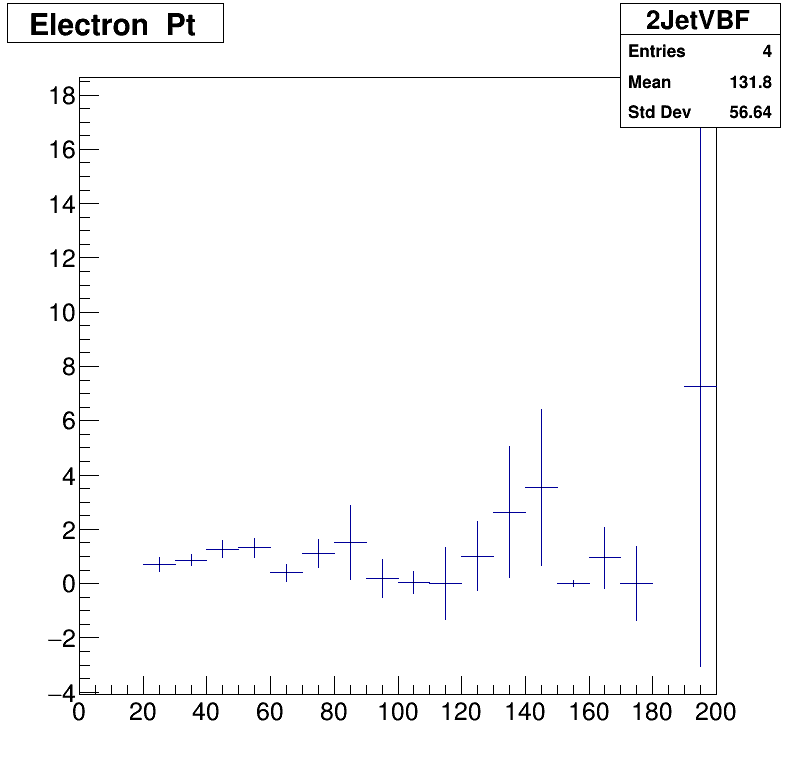

In [7]:
canvas = TCanvas("", "", 800, 800)
f = TFile('Pt.root')
h = f.Get('2JetVBF')
h.Draw()
canvas.Draw()